## Figures for our Neuron model 

Here are the steps which I am planning to take for the explananiton, which defines what kind of figures i need:

I am gonna cover three aspects:
- resonance (can refer to the paper by Andreas Herz)
- Subthreshold non-linearity to make the resonance asymetric
- Sodium nonlinearity which pulls up the membrane potential


Figures that I need:
- Equivalent circuit of the neuron for the simple RLC model
- the impedance vs frequency (logscale)
- the response of the model to ZAP (logscale) and an AM ZAP (linear scale)
- Equivalent circuit of the neuron for the RLC + impedance nonlinearity
- the impedance vs frequency (logscale)
- the response of the model to ZAP (logscale) and an AM ZAP (linear scale)
- Equivalent circuit of the neuron for the RLC + impedance nonlinearity + Na nonlinearity
- the impedance vs frequecny (logscale)
- the response of the model to ZAP (logscale) and an AM ZAP (linear scale)

### Notes about plots:

- all the plots that are concenred with frequency must be log scale

In [1]:
import functions as fn
import numpy as np
import matplotlib.pyplot as plt

## Simulation parameters

In [2]:
Sim_period = 50  # seconds
Sim_fs = 100000  # samples per second

Sim_dt = 1/Sim_fs
Sim_t = np.arange(0, Sim_period, Sim_dt)

## Stimulation Current

In [3]:
I_stim = 2e-6

In [4]:
# slope
slope = fn.gen_slope(init_time=0,
                     end_time= 1,
                     time_points=Sim_t)
# ================================================================================================ #


# DC
I1 = np.ones(Sim_t.shape)  # pA
# I = slope * I_stim * I1


# Pulse
# pulse = fn.gen_pulse(init_time=1,
#                   on_width=47,
#                   off_width=1,
#                   time_points=Sim_t)

# I = slope * pulse * I_stim


# Sinusoid
# I1 = fn.gen_sin(init_time=0,
#                 freq=1000,
#                 phase=0,
#                 time_points=Sim_t)

# I = slope * I_stim * I1


# AM 
# I1 = fn.gen_sin(init_time=0,
#                 freq=1000,
#                 phase=0,
#                 time_points=Sim_t)
# I1 = fn.gen_sin(init_time=0,
#                 freq=1000,
#                 phase=0,
#                 time_points=Sim_t)

# I = slope * (I_stim * (I1 + I2)) * 57  # 50, 55


# Sinusoid + Chirp (linear)
# I1 = fn.gen_sin(init_time=0,
#                 freq=1000,
#                 phase=0,
#                 time_points=Sim_t)

# I2, freq = fn.gen_chirp(Chirp_init_freq=1000, 
#                          Chirp_init_time=0, 
#                          Chirp_end_freq=1020, 
#                          Chirp_end_time=Sim_t[-1], 
#                          time_points=Sim_t)

# I = slope * (I_stim * (I1 + I2)) * 57  # 50, 55


# Sinusoid + Chirp (logarithmic)
I1 = fn.gen_sin(init_time=0,
                freq=1000,
                phase=0,
                time_points=Sim_t)

I2, freq = fn.gen_chirp(Chirp_init_freq=1000, 
                        Chirp_end_freq=1020, 
                        Chirp_end_time=Sim_t[-1], 
                        time_points=Sim_t,
                        method='logarithmic')
# freq -= 1000
I = slope * (I_stim * (I1 + I2)) * 57  # 50, 55


# Chirp - linear
# I1, freq = fn.gen_chirp(Chirp_init_freq=0.1, 
#                          Chirp_end_freq=20, 
#                          Chirp_end_time=Sim_t[-1], 
#                          time_points=Sim_t)

# I      = slope * I_stim * I1 # pA


# Chirp - logarithmic
I1, freq = fn.gen_chirp(Chirp_init_freq=0.1, 
                        Chirp_end_freq=1000, 
                        Chirp_end_time=Sim_t[-1], 
                        time_points=Sim_t,
                        method='logarithmic')

I      = 1 * I_stim * I1

Check the stimulation current

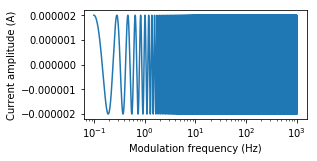

In [5]:
fig, ax = plt.subplots(figsize=(4,2))
ax.plot(freq, I)
plt.xscale('log')
plt.gca().set(xlabel='Modulation frequency (Hz)', ylabel='Current amplitude (A)')

# plt.savefig('Figures\Input_ZAP_OurModel_01-1000Chirp.png')

plt.show()

## Membrane parameters

I have defined this here so that all the values for the following parameters are in synchrony. In case a branch is not there, then the corresponding current can be set to zero.

In [6]:
C = .00001  # F

R_leak = 1e5
g_leak = 1 / R_leak
V_leak = 0

L = 25  # H
R_L = 200  # Ohm
g_L = 1/R_L  # S

R_p = 200
g_p = 1/R_p
V_p = 0

R_Na = 1000
g_Na = 1/R_Na

V_Na = 0.009  # .01

I_stim = 2e-6

tau_L = L / R_L

# I_stim = 2e-6

tau_L = L / R_L

print('Inductor time constant:', tau_L, 's')
print('Resonance frequency:', 1/(2*np.pi*np.sqrt(L*C)), 'Hz')

Inductor time constant: 0.125 s
Resonance frequency: 10.065842420897408 Hz


## Circui #1

![pic](Figures\OurModel\EqCircs1.png)

Define the frequency range (in log scale)

In [7]:
f = np.logspace(-2, 3, num=10000)  # Hz
w = 2 * np.pi * f

Compute the impedance profile

In [8]:
z_L = 1j*w*L + R_L
z_L_amp = np.sqrt(z_L.real**2 + z_L.imag**2)

z_C = (1j * w * C  + 1/R_leak) ** -1
z_C_amp = np.sqrt(z_C.real**2 + z_C.imag**2)

z = (1/z_C + 1/z_L) ** -1
z_amp = np.sqrt(z.real**2 + z.imag**2)

Plot the result

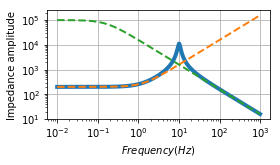

In [9]:
fig, ax = plt.subplots(figsize=(4,2))

ax.loglog(f, z_amp, linewidth=4, label='total impedance')
ax.loglog(f, z_L_amp, label='Inductor Impedance', linestyle='--', linewidth=2)
ax.loglog(f, z_C_amp, label='Capacitor Impedance', linestyle='--', linewidth=2)
ax.grid()
plt.gca().set(xlabel='$Frequency (Hz)$', ylabel='Impedance amplitude')

# ax.legend()
# plt.savefig('Figures\impedance_g_pLow.png')

plt.show()

----
## Circuit #2

![pic](Figures\OurModel\EqCircs2.png)

Define frequency range

In [10]:
f = np.logspace(-2, 3, num=10000)  # Hz
w = 2 * np.pi * f

Compute the impedance

In [11]:
g_p_cp = (1 / R_p) * 1  # increase this value and see the effect

z_L = 1j*w*L + R_L
z_L_amp = np.sqrt(z_L.real**2 + z_L.imag**2)

z_C = (1j * w * C  + 1/R_leak + g_p_cp) ** -1
z_C_amp = np.sqrt(z_C.real**2 + z_C.imag**2)

z = (1/z_C + 1/z_L + g_p_cp) ** -1
z_amp = np.sqrt(z.real**2 + z.imag**2)

Plot the result

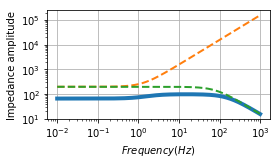

In [12]:
fig, ax = plt.subplots(figsize=(4,2))

ax.loglog(f, z_amp, linewidth=4, label='total impedance')
ax.loglog(f, z_L_amp, label='Inductor Impedance', linestyle='--', linewidth=2)
ax.loglog(f, z_C_amp, label='Capacitor Impedance', linestyle='--', linewidth=2)
ax.grid()
plt.gca().set(xlabel='$Frequency (Hz)$', ylabel='Impedance amplitude')

# ax.legend()
# plt.savefig('Figures\impedance_g_pMax.png')

plt.show()

#### R_p (R_z) nonlinearity

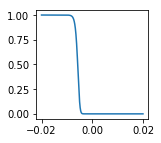

In [13]:
k = 1
V_half = -.005  # -0.004  -.0045 -.0065
coeff = 1800  # 3000  1000 1000
Vm = np.arange(-.02, .02, .00001)

Boltzman_nl = 1 - k / (1 + np.exp(coeff*(V_half - Vm)))
Boltzman_nl = Boltzman_nl**3 

fig, ax = plt.subplots(figsize=(2,2))
plt.plot(Vm, Boltzman_nl)

# plt.savefig('Figures\R_p_Nonlinearity.png')

plt.show()

----
## Circuit #3

![pic](Figures\OurModel\EqCircs3.png)

#### R_Na nonlinearity

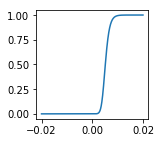

In [14]:
k_Na = 1
V_half_Na = 0.0038  # 0.0035
coeff_Na = 1000      # 500
Vm = np.arange(-.02, .02, .00001)

Boltzman_nl = k_Na / (1 + np.exp(coeff_Na*(V_half_Na - Vm)))
Boltzman_nl = Boltzman_nl**3 

fig, ax = plt.subplots(figsize=(2,2))
plt.plot(Vm, Boltzman_nl)

# plt.savefig('Figures\R_Na_Nonlinearity.png')

plt.show()

## Neuron Response

Keeping track of variables

In [26]:
Vm = np.zeros(Sim_t.shape)
I_L = np.zeros(Sim_t.shape)
I_Na = np.zeros(Sim_t.shape)
nl = np.zeros(Vm.shape)
nl_Na = np.zeros(Vm.shape)

In [27]:
for i in range(I.shape[0]-1):
    
    #non-linearity - resistor branch
    nl[i] =  1 - k / (1 + np.exp(coeff*(V_half - Vm[i])))
    nl[i] = nl[i]**3
    
    # non-linearity - Na branch
    nl_Na[i] =  k_Na / (1 + np.exp(coeff_Na*(V_half_Na - Vm[i])))
    nl_Na[i] = nl_Na[i]**3

    # current through the parallel branch
    I_p = g_p * nl[i] * (Vm[i] - V_p)
    
    # current through the Na
    I_Na[i] = g_Na * nl_Na[i] * (Vm[i] - V_Na)
    
    # current through the inductor
    I_L_ss = Vm[i] * g_L
    dILdt = (I_L_ss - I_L[i]) / tau_L
    I_L[i+1] = I_L[i] + dILdt * Sim_dt
    
    # current through the leak branch
    I_leak = g_leak * (Vm[i] - V_leak)
    
    # remove the nonlinearities (the model becomes linear!)
    I_p = 0  # if this is set to zero, change V_Na to 0.008
    I_Na[i] = 0
    
    dVmdt = (I[i] - I_p - I_Na[i] - I_L[i] - I_leak) / C
    Vm[i+1] = Vm[i] + dVmdt * Sim_dt

## Linear plots

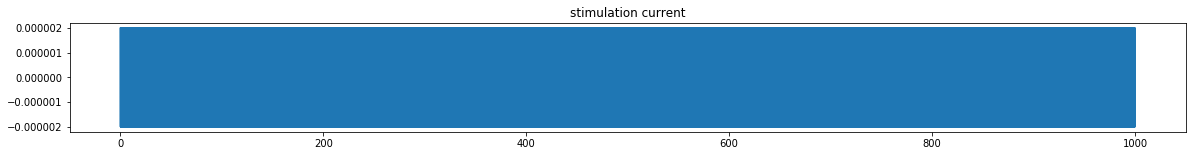

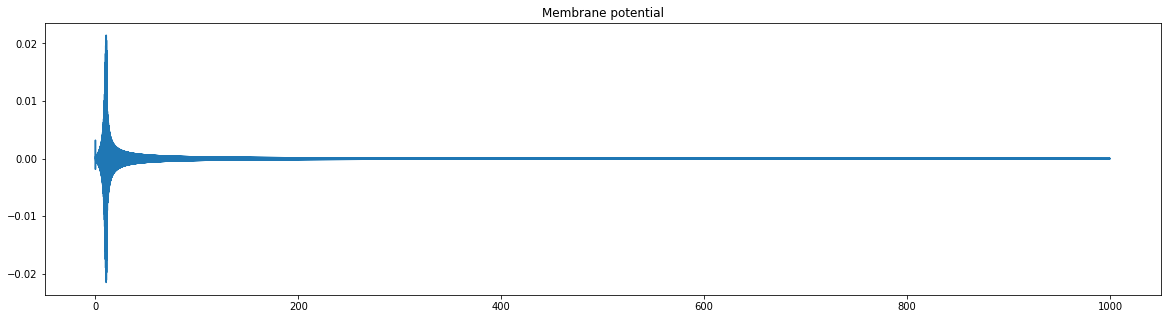

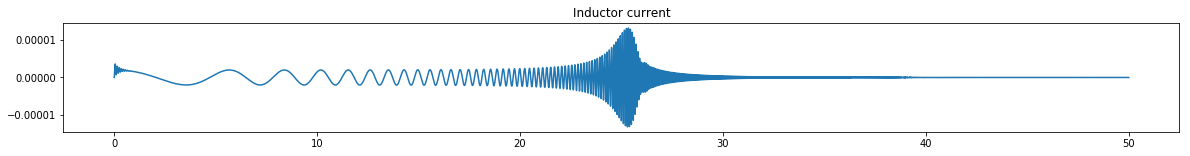

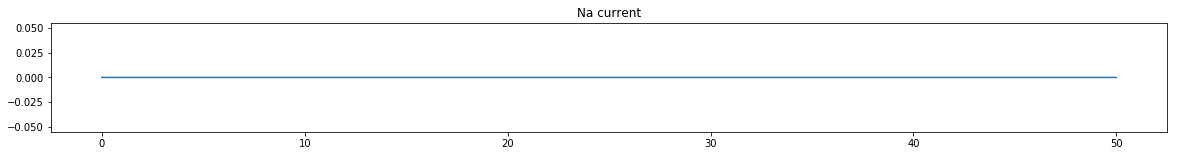

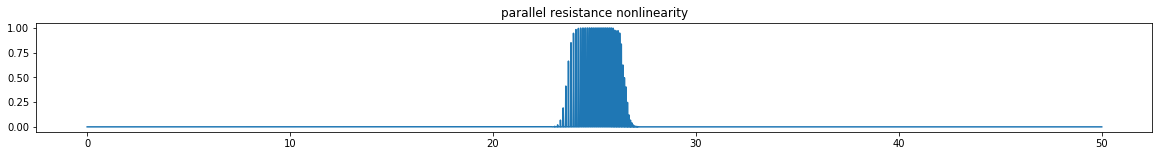

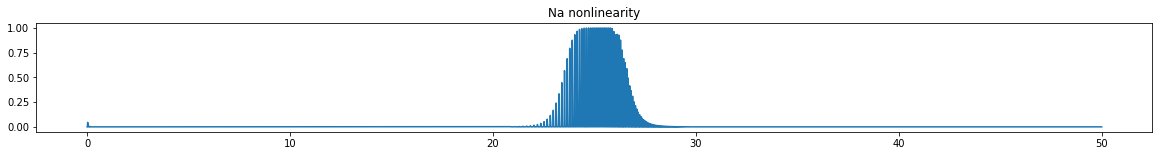

In [28]:
plt.figure(figsize=(20,2))
plt.plot(freq, I)
plt.title('stimulation current')
plt.show()

plt.figure(figsize=(20,5))
plt.plot(freq, Vm)
plt.title('Membrane potential')
plt.show()

plt.figure(figsize=(20,2))
plt.plot(Sim_t, I_L)
plt.title('Inductor current')
plt.show()

plt.figure(figsize=(20,2))
plt.plot(Sim_t, I_Na)
plt.title('Na current')
plt.show()

plt.figure(figsize=(20,2))
plt.plot(Sim_t, nl)
plt.title('parallel resistance nonlinearity')
plt.show()

plt.figure(figsize=(20,2))
plt.plot(Sim_t, nl_Na)
plt.title('Na nonlinearity')
plt.show()

## log scale plots

In [ ]:
plt.figure(figsize=(20,2))
plt.plot(freq, I)
# plt.xscale('log')
plt.title('stimulation current')
plt.show()

plt.figure(figsize=(5,3))
plt.plot(freq, Vm)
plt.xscale('log')
# plt.title('Membrane potential')
# plt.savefig('Figures\Response_OurModel_AMZAP_1000Sin_01-1000Chirp_EqCirc3.png')
plt.show()

plt.figure(figsize=(20,2))
plt.plot(freq, I_L)
plt.xscale('log')
plt.title('Inductor current')
plt.show()

plt.figure(figsize=(20,2))
plt.plot(freq, I_Na)
plt.xscale('log')
plt.title('Na current')
plt.show()

plt.figure(figsize=(20,2))
plt.plot(freq, nl)
plt.xscale('log')
plt.title('parallel resistance nonlinearity')
plt.show()

plt.figure(figsize=(20,2))
plt.plot(freq, nl_Na)
plt.xscale('log')
plt.title('Na nonlinearity')
plt.show()

## Save plots

In [18]:
save = True

input current

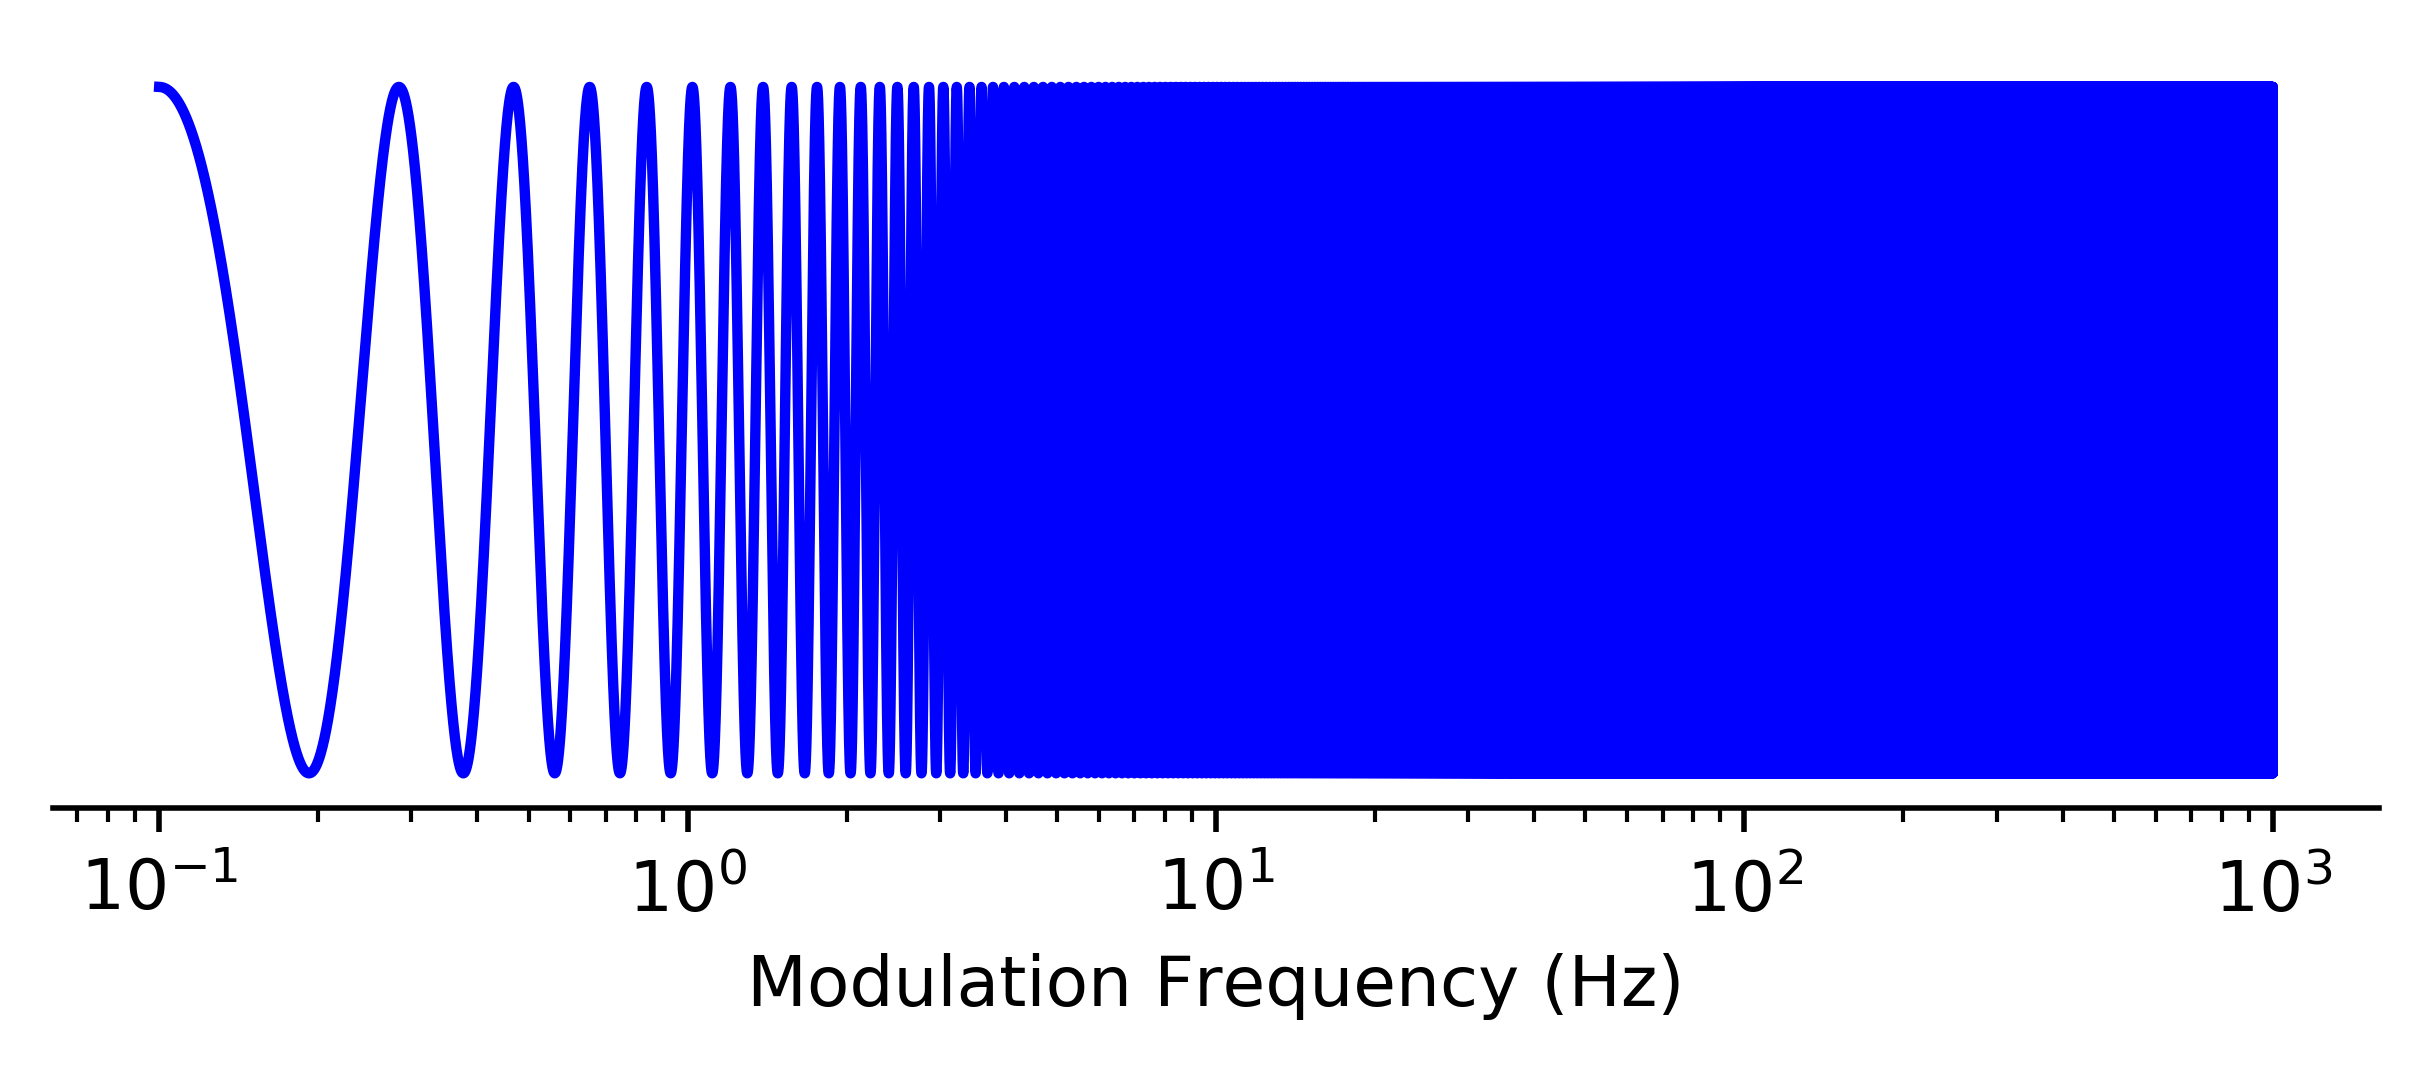

In [20]:
fig, ax = plt.subplots(figsize=(6, 2), dpi=500)

# remove axes
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# set axes limits
# ax.set_ylim([-.006, .009])

# set ticks
ax.set_yticks([],[])

# add label
ax.set_xlabel('Modulation Frequency (Hz)')

ax.plot(freq, I, 'blue')
plt.xscale('log') # uncomment this if applying a pure sinusoid


if save:
    name = 'ZAP_input'
    folder = 'D:/TUM/Semester 3 - Holidays/Symposium/Presentation/Figures/Model_response/'
    path = folder + name
    plt.savefig(path + '.png', bbox_inches = 'tight')
    

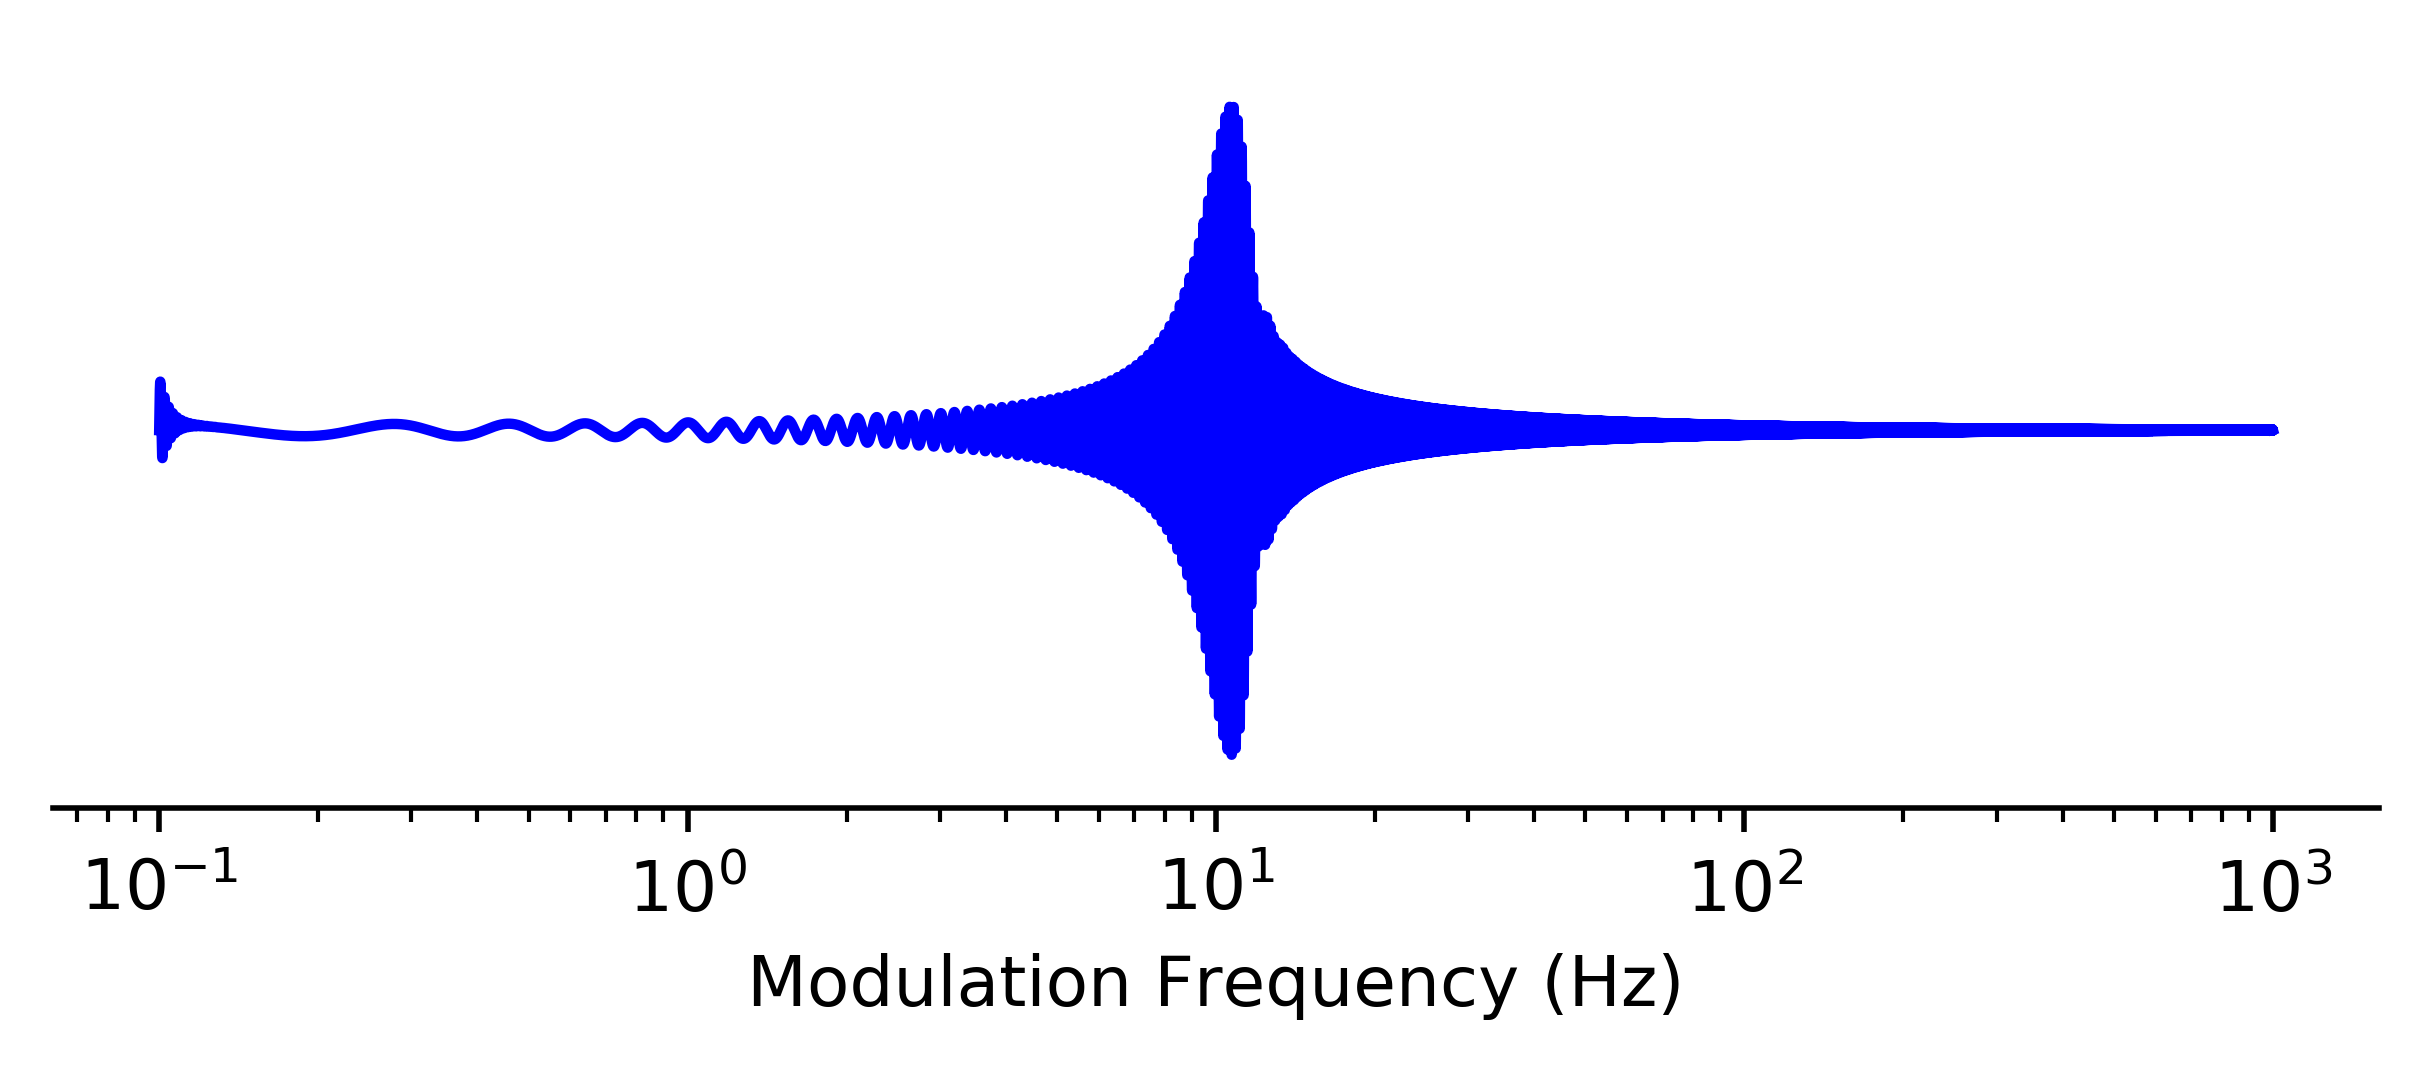

In [29]:
fig, ax = plt.subplots(figsize=(6, 2), dpi=500)

# remove axes
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# set axes limits
# ax.set_ylim([-.006, .009])
ax.set_ylim([-.025, .025]) # uncomment this if applying a pure sinusoid

# set ticks
ax.set_yticks([],[])

# add label
ax.set_xlabel('Modulation Frequency (Hz)')

ax.plot(freq, Vm, 'blue')
plt.xscale('log')  # uncomment this if applying a pure sinusoid

if save:
    name = 'ZAP_1000Sin_01-1000Chirp_EqCirc1'
    folder = 'D:/TUM/Semester 3 - Holidays/Symposium/Presentation/Figures/Model_response/'
    path = folder + name
    plt.savefig(path + '.png', bbox_inches = 'tight')
    